1- Importing Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mis
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import boxcox


2- Reading CSV File.

In [2]:
diamonds = pd.read_csv(r'E:\DEPI AI COURSE\Lectures\Technical\Assignments\Assignment 5\diamonds.csv')
df1=pd.DataFrame(diamonds)

In [3]:
df1

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


3- Encoding Categorical Columns.

In [4]:
df1 = pd.get_dummies(df1, columns=['cut', 'color', 'clarity'], drop_first=True)

4- Calculating Correlation And Droping Unnecessary Columns.

In [5]:
df1.corr()['price']

Unnamed: 0      -0.306873
carat            0.921591
depth           -0.010647
table            0.127134
price            1.000000
x                0.884435
y                0.865421
z                0.861249
cut_Good        -0.000312
cut_Ideal       -0.097175
cut_Premium      0.095706
cut_Very Good    0.006593
color_E         -0.101089
color_F         -0.024161
color_G          0.008556
color_H          0.059223
color_I          0.097125
color_J          0.081710
clarity_IF      -0.049596
clarity_SI1      0.008957
clarity_SI2      0.128420
clarity_VS1     -0.009886
clarity_VS2     -0.001062
clarity_VVS1    -0.095266
clarity_VVS2    -0.052381
Name: price, dtype: float64

In [6]:
columns_to_drop = ['cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'table', 'depth', 'Unnamed: 0']
df1 = df1.drop(columns=columns_to_drop)

df1['volume'] = df1['x'] * df1['y'] * df1['z']
df1 = df1.drop(columns=['x', 'y', 'z'])  

df1 = df1[df1['volume'] > 0]  



In [7]:
df1.corr()['price']

carat     0.921592
price     1.000000
volume    0.904255
Name: price, dtype: float64

5- Calculating Number Of Null Values In Each Column And Number Of Duplicated Rows.

In [8]:
missing_values = df1.isnull().sum()
print("Missing values per column:\n", missing_values)

print("-------------------------------------------------------")

duplicates = df1.duplicated().sum()
print(f"Number of duplicated rows: {duplicates}")

Missing values per column:
 carat     0
price     0
volume    0
dtype: int64
-------------------------------------------------------
Number of duplicated rows: 626


In [9]:
df1 = df1.drop_duplicates()

In [10]:
duplicates = df1.duplicated().sum()
print(f"Number of duplicated rows: {duplicates}")

Number of duplicated rows: 0


5- Data Cleaning.

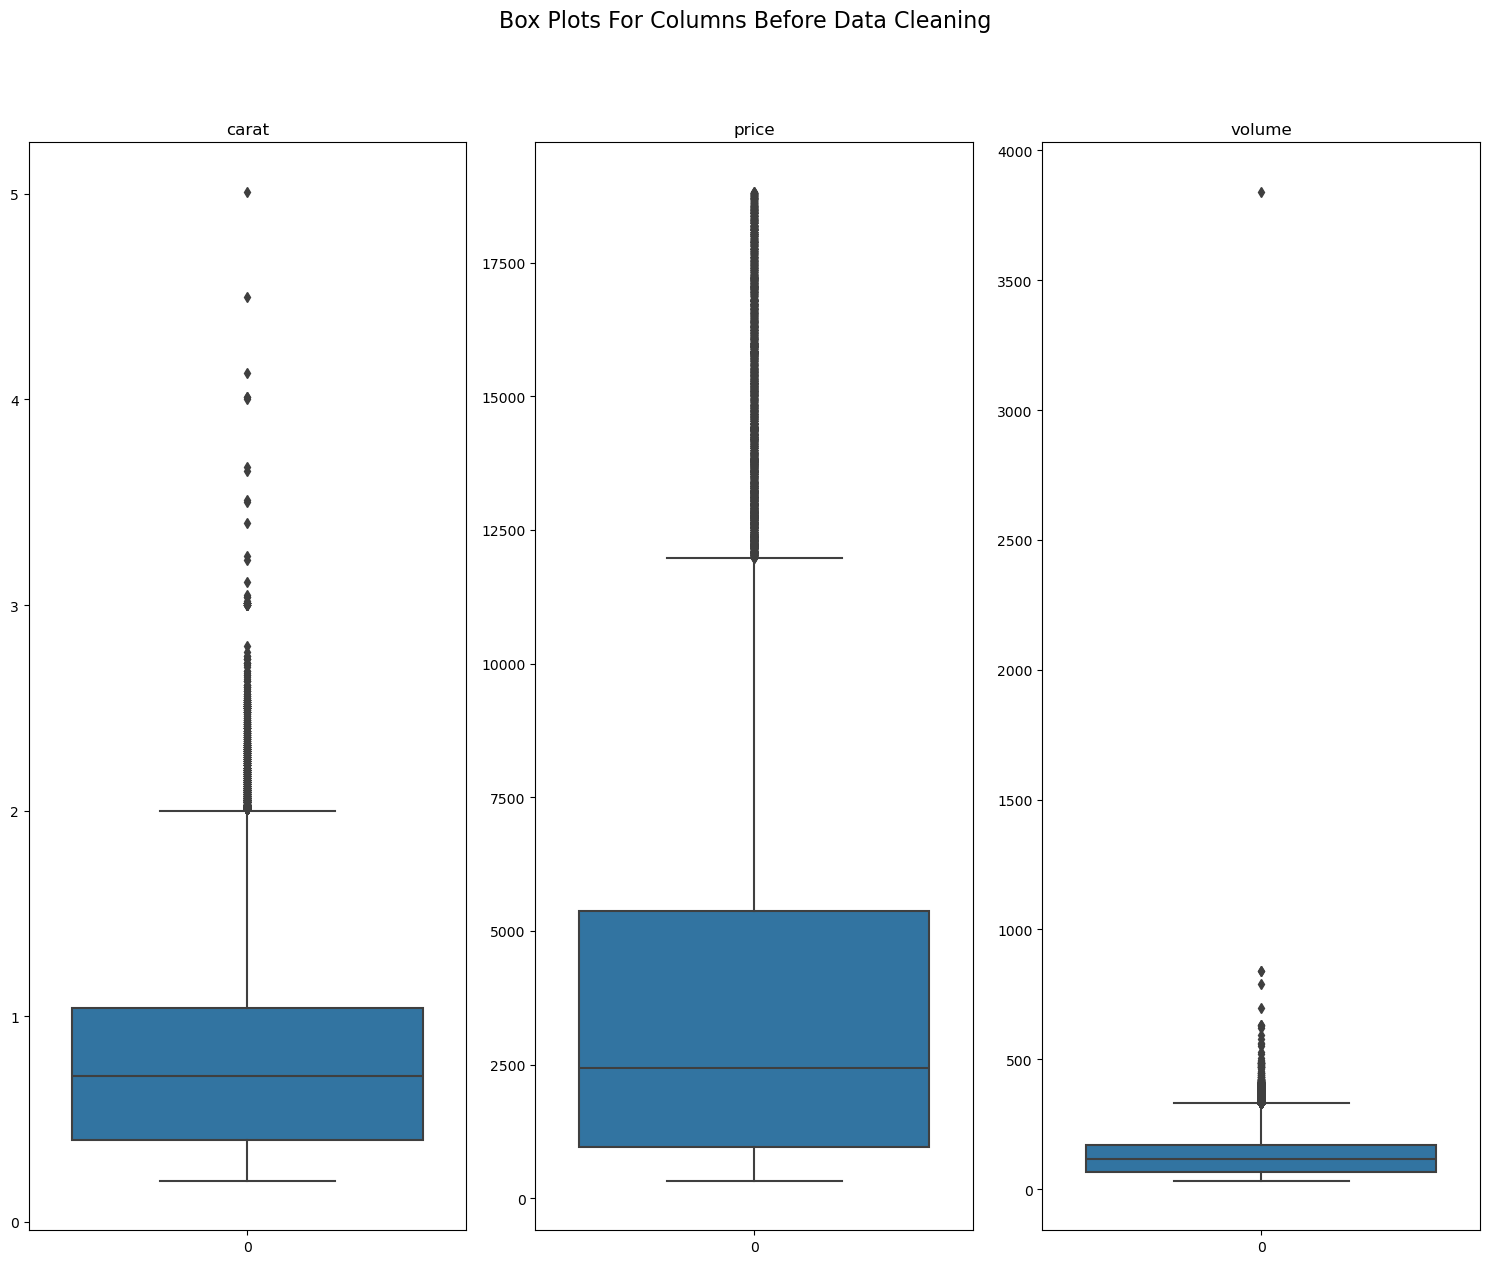

In [11]:
columns = ['carat', 'price', 'volume']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 12))  
axes = axes.flatten()  

for i, col in enumerate(columns):
    sns.boxplot(data=df1[col], ax=axes[i]) 
    axes[i].set_title(col)
fig.suptitle('Box Plots For Columns Before Data Cleaning', fontsize=16, y=1.05)

plt.tight_layout()
plt.show()

In [12]:
for i in range(2):
    Q1 = df1['carat'].quantile(0.25)
    Q3 = df1['carat'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    while True:
        outliers = (df1['carat'] < lower_bound) | (df1['carat'] > upper_bound)
        if not outliers.any():  
            break
        
        df1.loc[outliers, 'carat'] = df1.loc[~outliers, 'carat'].mean()
        Q1 = df1['carat'].quantile(0.25)
        Q3 = df1['carat'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
    print(f'Number of outliers: {outliers.sum()}')

    df1['carat'] = df1['carat'].fillna(df1['carat'].mean())

Number of outliers: 0
Number of outliers: 0


In [13]:
Q1 = df1['price'].quantile(0.25)
Q3 = df1['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

while True:
    outliers = (df1['price'] < lower_bound) | (df1['price'] > upper_bound)
    if not outliers.any():
        break  
    
    df1.loc[outliers, 'price'] = df1.loc[~outliers, 'price'].mean()
    Q1 = df1['price'].quantile(0.25)
    Q3 = df1['price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
print(f'Number of outliers: {outliers.sum()}')

df1['price'] = df1['price'].fillna(df1['price'].mean())

Number of outliers: 0


C:\Users\Eng Hassan\AppData\Local\Temp\ipykernel_11328\529686543.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3193.8249162302614' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.loc[outliers, 'price'] = df1.loc[~outliers, 'price'].mean()


In [14]:
Q1 = df1['volume'].quantile(0.25)
Q3 = df1['volume'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

while True:
    outliers = (df1['volume'] < lower_bound) | (df1['volume'] > upper_bound) 
    if not outliers.any():
        break  
    
    df1.loc[outliers, 'volume'] = df1.loc[~outliers, 'volume'].mean()
    Q1 = df1['volume'].quantile(0.25)
    Q3 = df1['volume'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
print(f'Number of outliers: {outliers.sum()}')

df1['volume'] = df1['volume'].fillna(df1['volume'].mean())

Number of outliers: 0


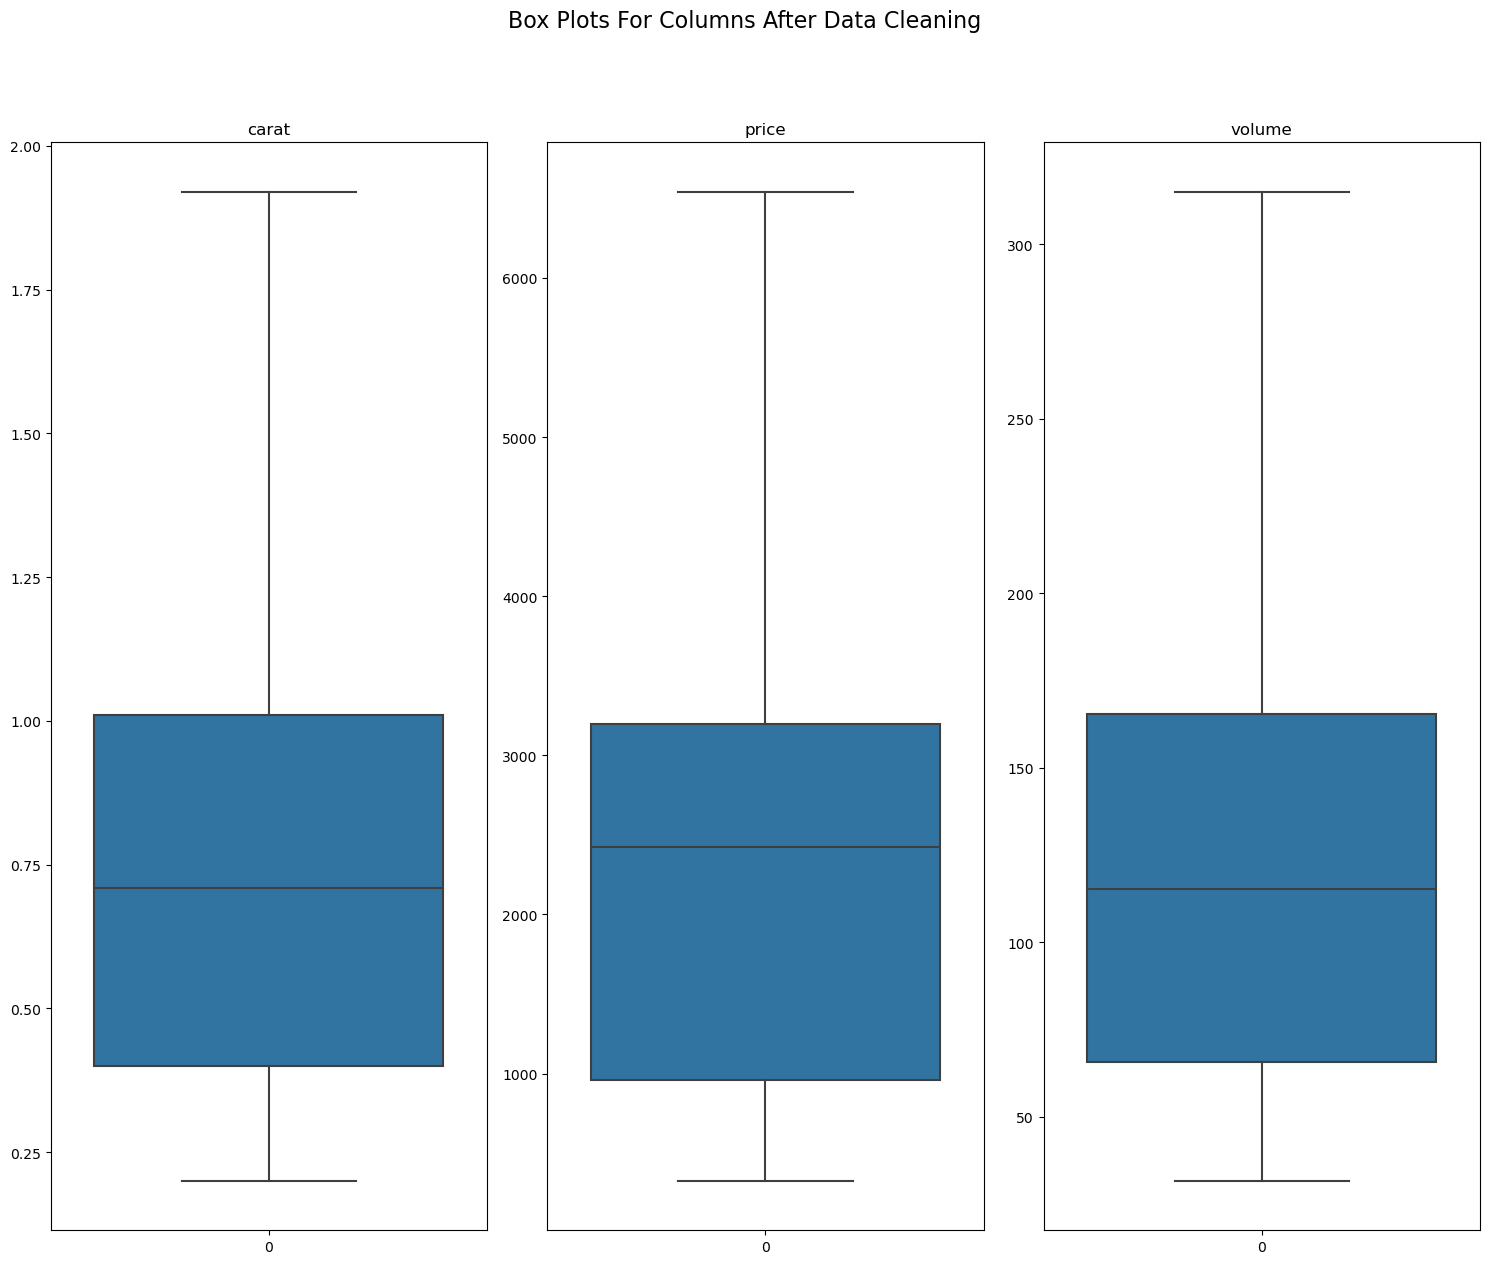

In [15]:
columns = ['carat', 'price', 'volume']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 12))  
axes = axes.flatten()  

for i, col in enumerate(columns):
    sns.boxplot(data=df1[col], ax=axes[i]) 
    axes[i].set_title(col)
fig.suptitle('Box Plots For Columns After Data Cleaning', fontsize=16, y=1.05)

plt.tight_layout()
plt.show()

In [16]:
print(df1['carat'].count())
print(df1['price'].count())
print(df1['volume'].count())

53294
53294
53294


6- Plotting To Know the Appropraite ML Model.

C:\Users\Eng Hassan\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


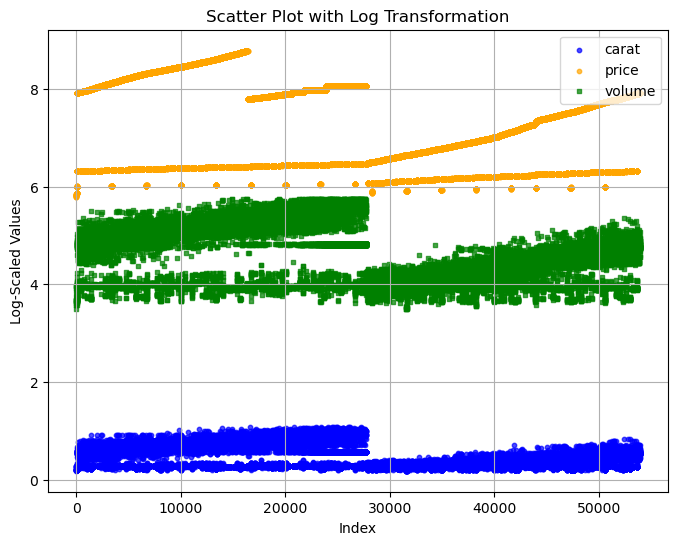

In [17]:
df1['price'] = np.log1p(df1['price'])  
df1['carat'] = np.log1p(df1['carat'])
df1['volume'] = np.log1p(df1['volume'])

plt.figure(figsize=(8, 6))

plt.scatter(df1.index, df1['carat'], label='carat', color='blue', alpha=0.7, s=10)
plt.scatter(df1.index, df1['price'], label='price', color='orange', alpha=0.7, s=10)
plt.scatter(df1.index, df1['volume'], label='volume', color='green', marker='s', alpha=0.7, s=10)

plt.xlabel("Index")
plt.ylabel("Log-Scaled Values")
plt.title("Scatter Plot with Log Transformation")
plt.legend()
plt.grid(True)

plt.show()

7- Apllying Polynomial Regression Model.

In [18]:
Features = df1.drop(columns=['price'])
Label = df1['price']

X_train, X_test_validation, y_train, y_test_validation = train_test_split(Features, Label, train_size=31978 , random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_test_validation, y_test_validation, test_size=10658, random_state=42)

print("X_train shape:", X_train.shape)
print("X_validation shape:", X_validation.shape)
print("X_test shape:", X_test.shape)

X_train shape: (31978, 2)
X_validation shape: (10658, 2)
X_test shape: (10658, 2)


In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

In [20]:
poly_features = PolynomialFeatures(degree=2)  
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
X_val_poly = poly_features.transform(X_validation)

model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [21]:
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)
y_val_pred = model.predict(X_val_poly)

In [22]:
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [23]:
print(f"Training R² (Overfitting): {train_r2:.2f}")
print(f"Test R² (Overfitting): {test_r2:.2f}")

Training R² (Overfitting): 0.88
Test R² (Overfitting): 0.88


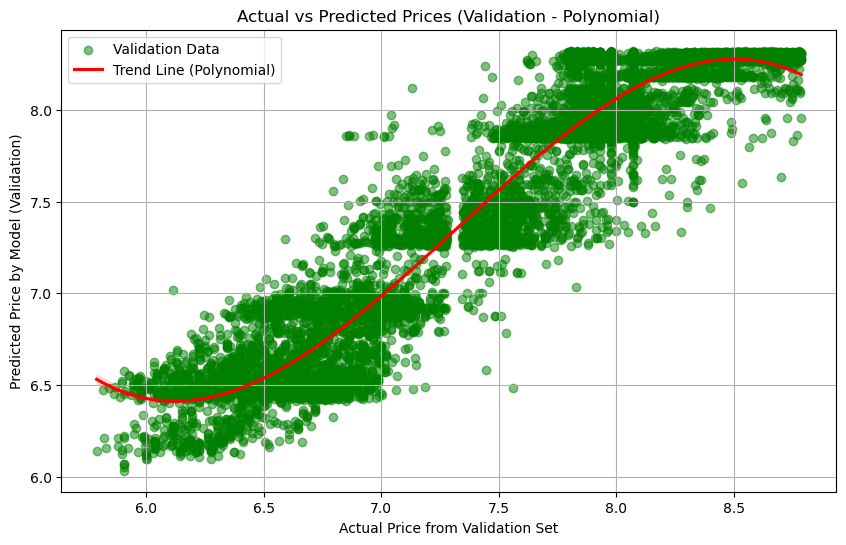

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y_validation, y_val_pred, color='green', alpha=0.5, label="Validation Data")


sns.regplot(x=y_validation, y=y_val_pred, scatter=False, color='red', order=3, label="Trend Line (Polynomial)")


plt.xlabel("Actual Price from Validation Set")
plt.ylabel("Predicted Price by Model (Validation)")
plt.title("Actual vs Predicted Prices (Validation - Polynomial)")
plt.legend()
plt.grid(True)

plt.show()

8- Saving Final CSV File.

In [26]:
df1.to_csv('Final File.csv', index=False)